In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import axes3d 

def gen_post(Tp: float, Px: float, Tn: float) -> float:
    # this is solving P(X|positive) = (TruePositive * prob X) / (Prob positive)
    Pp = (1-Tn)*(1-Px) + Tp*Px #this is Prob positive as it considers when a false positive occurs and when a true positive occurs
    sol = (Tp*Px)/Pp

    return sol


ProbX = 0.01   #prior
TruePos = 0.95 #sensi
TrueNeg = 0.9  #specf
print(f"The percentage of P(infected given Positive) is {100*gen_post(TruePos,ProbX,TrueNeg)}%")
#print(100*gen_post(TruePos,ProbX,TrueNeg))


quality = 150
Variable = np.linspace(0.001,1,num=quality)
#for storing we will use Data[TruePos][ProbX][TrueNeg]
storing = np.zeros((quality,quality,quality))
for i in range(quality):
    for j in range(quality):
        for k in range(quality):
            storing[i][j][k] = gen_post(Variable[i],Variable[j],Variable[k])



The percentage of P(infected given Positive) is 8.755760368663596%


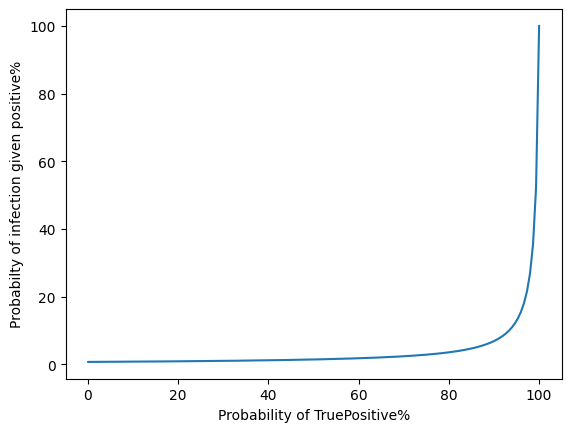

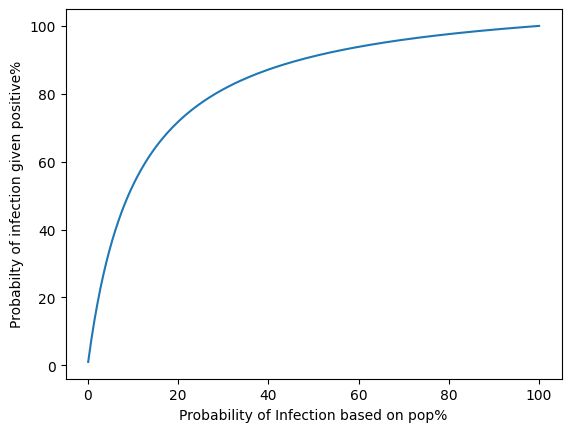

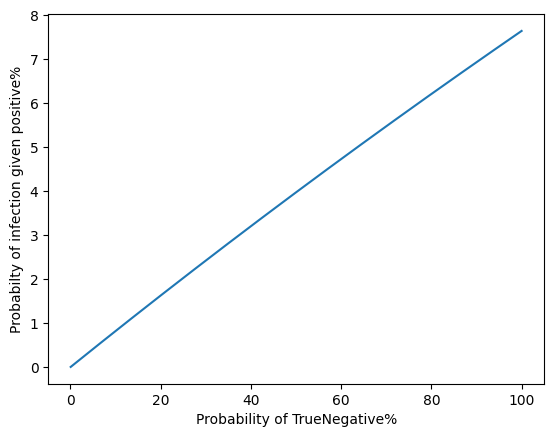

In [73]:
plt.plot(100*Variable,100*storing[int(quality*.95), int(quality*.01), :])
plt.ylabel('Probabilty of infection given positive%')
plt.xlabel('Probability of TruePositive%')
plt.show()

plt.plot(100*Variable,100*storing[int(quality*.95), :, int(quality*.9)])
plt.xlabel('Probability of Infection based on pop%')
plt.ylabel('Probabilty of infection given positive%')
plt.show()

plt.plot(100*Variable,100*storing[:,int(quality*.01), int(quality*.9)])
plt.xlabel('Probability of TrueNegative%')
plt.ylabel('Probabilty of infection given positive%')
plt.show()



In [46]:

#for 3d plotting we need to have x,y be Variable aka the linspace from 0 to 1
#and Z be the function based off of holding one variable constant in storing
#aka storing[:,:,int(quality*0.9)] or something for TrueProbability and population infection percentage while holding TrueNeg constant to 90%



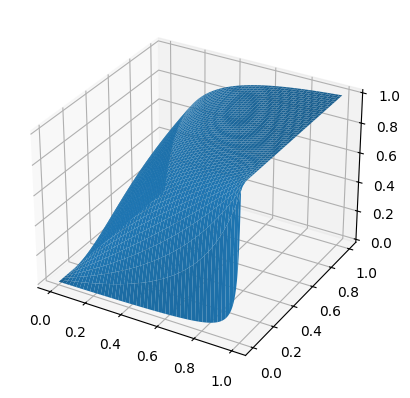

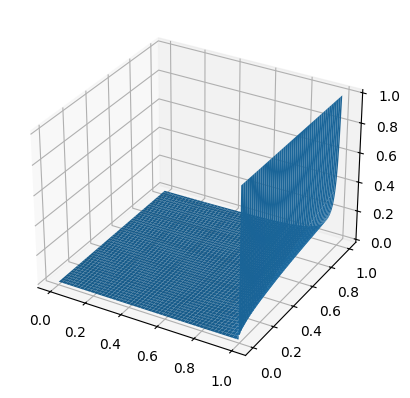

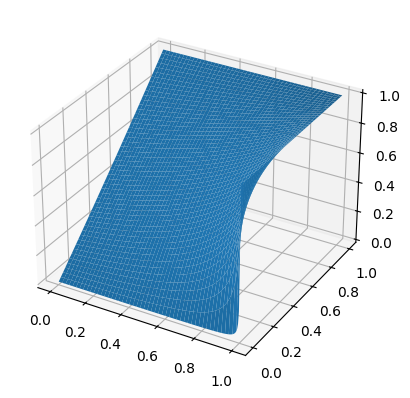

In [60]:

#NO CLUE HOW TO LABEL, VERY CONFUSED

X = Variable
Y = Variable
data = storing[:,:,int(quality*0.9)]

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

data = storing[:,int(quality*0.01),:]

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

data = storing[int(quality*0.95),:,:]

hf = plt.figure()
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, data)

